In [20]:
# Import libraries necessary for this project
import numpy as np
from mpl_toolkits import mplot3d
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Lasso
# Pretty display for notebooks
%matplotlib inline
# Load the NSE housing dataset
# stock_df = pd.read_csv("NGE.csv")
stock_df = pd.read_excel("NGE.xls", "NGE", index_col=None, na_values=['NA'])
stock_df.head()
# print(stock_df.index())

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-04-03,63.520000,63.520000,63.320000,63.320000,52.700424,300
1,2013-04-04,63.240002,63.240002,62.639999,62.919998,52.367508,200
2,2013-04-05,63.200001,63.200001,62.639999,62.840000,52.300930,500
3,2013-04-08,63.720001,63.720001,62.439999,63.200001,52.600548,5000
4,2013-04-09,62.040001,62.480000,61.200001,61.200001,50.935974,3600


In [21]:
print(stock_df)

           Date       Open       High        Low      Close  Adj Close  Volume
0    2013-04-03  63.520000  63.520000  63.320000  63.320000  52.700424     300
1    2013-04-04  63.240002  63.240002  62.639999  62.919998  52.367508     200
2    2013-04-05  63.200001  63.200001  62.639999  62.840000  52.300930     500
3    2013-04-08  63.720001  63.720001  62.439999  63.200001  52.600548    5000
4    2013-04-09  62.040001  62.480000  61.200001  61.200001  50.935974    3600
5    2013-04-10  60.599998  61.080002  60.080002  60.080002  50.003815    1800
6    2013-04-11  60.560001  61.040001  59.919998  60.599998  50.436604     900
7    2013-04-12  60.360001  60.439999  60.000000  60.360001  50.236855    1000
8    2013-04-15  60.639999  60.639999  59.200001  59.200001  49.271397    2200
9    2013-04-16  59.919998  59.919998  59.639999  59.639999  49.637608     200
10   2013-04-17  58.840000  59.520000  58.160000  58.599998  48.772030     900
11   2013-04-18  58.320000  58.320000  58.320000  58

In [22]:
print(stock_df.describe())
print(stock_df.info())

              Open         High          Low        Close    Adj Close  \
count  1510.000000  1510.000000  1510.000000  1510.000000  1510.000000   
mean     34.032444    34.344556    33.649801    33.957901    29.667998   
std      17.380578    17.440182    17.279634    17.351200    13.773470   
min      14.750000    15.050000    14.650000    14.660000    13.619122   
25%      19.040001    19.265000    18.657500    19.040001    17.898098   
50%      25.225000    25.559999    24.659999    25.010000    22.969975   
75%      55.860000    56.060001    55.150001    55.779999    46.754610   
max      67.120003    67.279999    65.360001    65.480003    55.193237   

              Volume  
count    1510.000000  
mean    16989.801325  
std     26273.659513  
min         0.000000  
25%      3500.000000  
50%     10100.000000  
75%     21900.000000  
max    455800.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
Date         1510 no

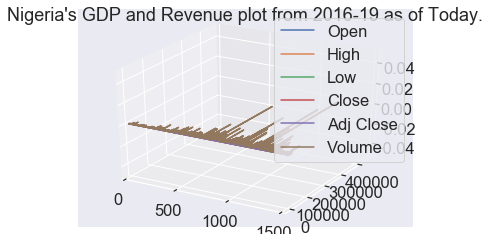

In [23]:
fig = plt.figure()
ax = plt.axes(projection='3d')
plt.title("Nigeria's GDP and Revenue plot from 2016-19 as of Today.")
stock_df['Open'].plot()
stock_df['High'].plot()
stock_df['Low'].plot()
stock_df['Close'].plot()
stock_df['Adj Close'].plot()
stock_df['Volume'].plot()
plt.legend(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

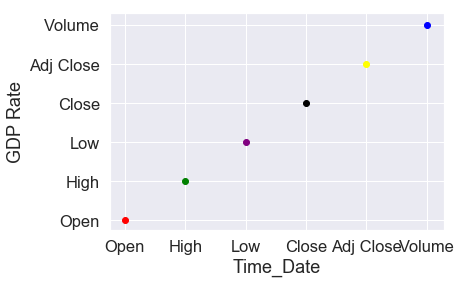

In [24]:
plt.scatter('Open', 'Open', color='red')
plt.scatter('High','High', color='green')
plt.scatter('Low', 'Low', color='purple')
plt.scatter('Close', 'Close', color='black')
plt.scatter('Adj Close', 'Adj Close', color='yellow')
plt.scatter('Volume', 'Volume', color='blue')
plt.xlabel('Time_Date')
plt.ylabel('GDP Rate')
plt.show()

In [25]:
a= stock_df['Open']
b= stock_df['High']
c= stock_df['Low']
d= stock_df['Close']
e= stock_df['Adj Close']
f= stock_df['Volume']
print(a, b, c, d, e, f)

0       63.520000
1       63.240002
2       63.200001
3       63.720001
4       62.040001
5       60.599998
6       60.560001
7       60.360001
8       60.639999
9       59.919998
10      58.840000
11      58.320000
12      58.320000
13      59.520000
14      59.320000
15      59.480000
16      59.400002
17      59.639999
18      59.560001
19      60.160000
20      59.880001
21      60.119999
22      60.560001
23      61.439999
24      61.000000
25      62.639999
26      62.400002
27      63.400002
28      62.720001
29      63.279999
          ...    
1480    18.200001
1481    17.790001
1482    18.370001
1483    18.330000
1484    18.500000
1485    18.150000
1486    18.040001
1487    17.559999
1488    17.520000
1489    17.389999
1490    17.629999
1491    17.900000
1492    17.680000
1493    17.500000
1494    17.660000
1495    17.639999
1496    17.490000
1497    17.500000
1498    17.520000
1499    17.500000
1500    17.360001
1501    17.340000
1502    17.340000
1503    17.379999
1504    17

In [26]:
stock_df.groupby(['Open']).mean()
stock_df.groupby(['High']).mean()
stock_df.groupby(['Low']).mean()
stock_df.groupby(['Close']).mean()
stock_df.groupby(['Adj Close']).mean()
stock_df.groupby(['Volume']).mean()

,Open,High,Low,Close,Adj Close
Volume,,,,,
0,59.120000,59.173333,59.120000,59.173333,49.320638
100,59.937143,60.331428,59.731429,60.182858,50.183932
200,60.331429,60.468571,59.988571,60.217142,50.212723
300,60.511111,60.760001,60.366667,60.588889,50.543184
400,57.192727,57.498181,56.890909,57.109091,47.904823
500,55.380000,55.932727,55.029091,55.581818,46.700531
600,58.781177,58.898824,58.310588,58.618823,49.207435
700,58.952728,59.312728,58.410910,58.832727,49.135836
800,50.538572,50.860714,50.262143,50.543572,42.859179


In [27]:
# we get the entire column of the feature we need to encode
openList = stock_df['Open'].tolist()
# we instantiate a LabelEncoder, fit it to the column, and transform it into a list of numbers, which go back into our DataFrame.
labelEncoderOpen = LabelEncoder()
labelEncoderOpen.fit(openList)
labelOpen = labelEncoderOpen.transform(openList)
stock_df['Open']=pd.Series(labelOpen)

In [28]:
# we also need to prepare the training and test splits for the data. The following function does that.

def prepareDataset(stock_df):
#Keep track of the features
    headers = list(stock_df)

#Store the revenues separately in a list
    YIndex = headers.index('Open')
    datasetMatrix = stock_df.as_matrix()
#Make the train and test splits
    datasetTrain = datasetMatrix[0:1500]
    datasetTrainWithoutLabels = np.delete(datasetTrain,YIndex,1)

    labels = datasetTrain[:,YIndex]

    datasetTest = datasetMatrix[1500:datasetMatrix.shape[0]]
    datasetTestWithoutLabels = np.delete(datasetTest,YIndex,1)

    trueLabels = datasetTest[:,YIndex]
    
    return headers, datasetMatrix, datasetTrainWithoutLabels, labels, datasetTest, datasetTestWithoutLabels,trueLabels

prepareDataset(stock_df)

c:\users\confidence\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':


(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'],
 array([[Timestamp('2013-04-03 00:00:00'), 842, 63.52, ..., 63.32,
         52.700424, 300],
        [Timestamp('2013-04-04 00:00:00'), 835, 63.240002, ..., 62.919998,
         52.367508, 200],
        [Timestamp('2013-04-05 00:00:00'), 834, 63.200001, ..., 62.84,
         52.30093, 500],
        ...,
        [Timestamp('2019-03-28 00:00:00'), 77, 17.049999, ..., 17.049999,
         17.049999, 8600],
        [Timestamp('2019-03-29 00:00:00'), 77, 17.01, ..., 16.889999,
         16.889999, 8200],
        [Timestamp('2019-04-01 00:00:00'), 67, 17.09, ..., 16.870001,
         16.870001, 13700]], dtype=object),
 array([[Timestamp('2013-04-03 00:00:00'), 63.52, 63.32, 63.32, 52.700424,
         300],
        [Timestamp('2013-04-04 00:00:00'), 63.240002, 62.639999,
         62.919998, 52.367508, 200],
        [Timestamp('2013-04-05 00:00:00'), 63.200001, 62.639999, 62.84,
         52.30093, 500],
        ...,
        [Timestam

In [29]:

# we initialize a Lasso regressor object and define the range of alphas we plan to search over to find the one that gives the best training accuracy determined by cross validation
regressor = Lasso()
alphas = np.arange(1,50)
# Now, we build our pipeline. In our case, it has only one step, i.e. making predictions using the regression model:
steps = [('regressor',regressor)]
pipeline = Pipeline(steps) # define the pipeline object
parameterGrid = dict(regressor__alpha = alphas)

In [30]:
figures = stock_df['Adj Close']
prices = stock_df['Volume']
features = stock_df.drop('Volume', axis = 1)

In [31]:
# Minimum price of the data
minimum_price = np.amin(prices)

# Maximum price of the data
maximum_price = np.amax(prices)

# Mean price of the data
mean_price = np.mean(prices)

# Median price of the data
median_price = np.median(prices)

# Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Nigeria's Stock dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Nigeria's Stock dataset:

Minimum price: $0
Maximum price: $455800
Mean price: $16989.80132450331
Median price $10100.0
Standard deviation of prices: $26264.95818457264


c:\users\confidence\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


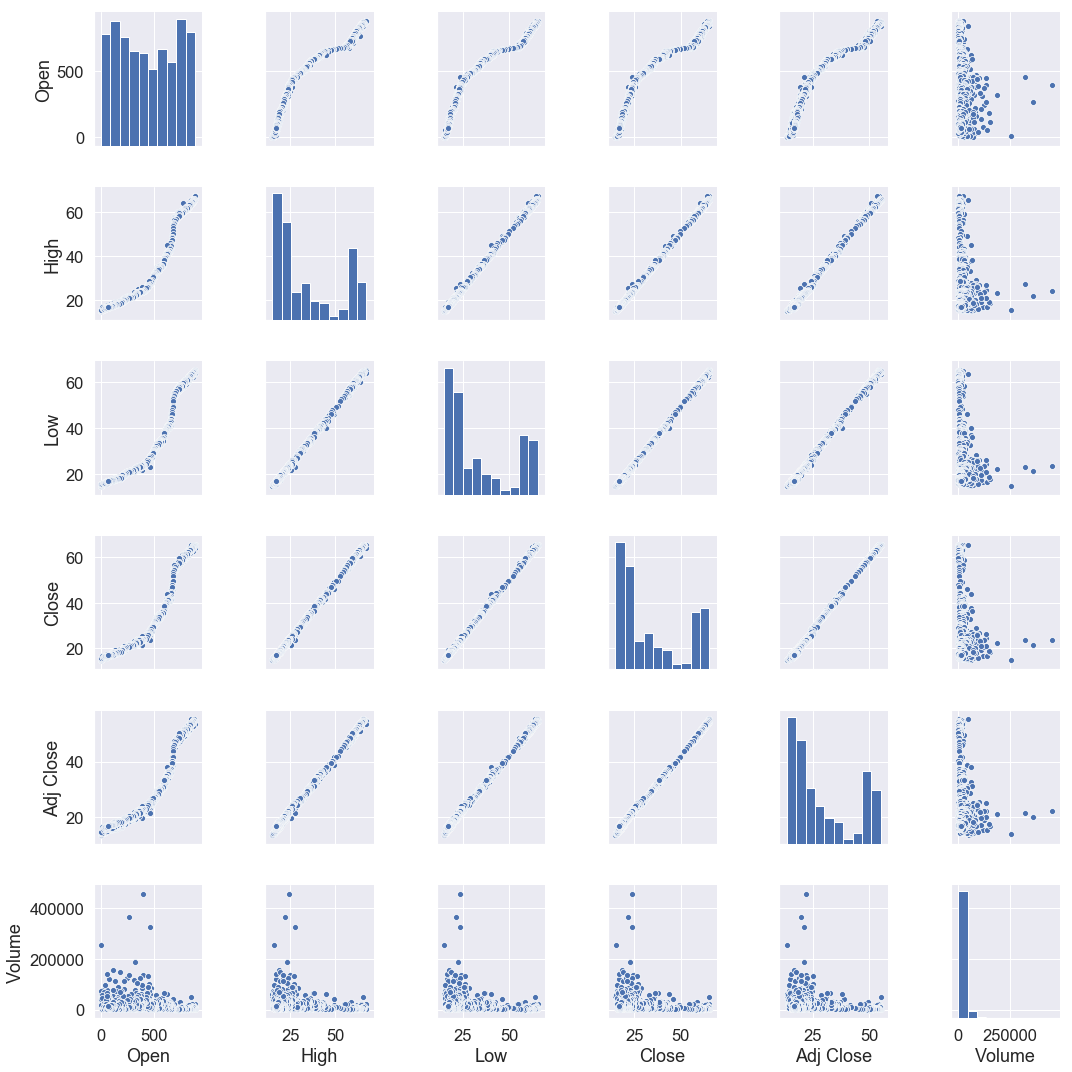

In [32]:

import seaborn as sns
# Calculate and show pairplot
sns.pairplot(stock_df, size=2.5)
plt.tight_layout()

In [33]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)

# Success
print("Training and testing split was successful.")

Training and testing split was successful.


In [34]:
# Calculate and show correlation matrix
cm = np.corrcoef(stock_df['Volume'].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=cols,
                xticklabels=cols)

NameError: name 'cols' is not defined

In [40]:
stock_df.sort_values('Volume', ascending=False)
stock_df.sort_values('Open', ascending=False)
stock_df.sort_values('High', ascending=False)
stock_df.sort_values('Low', ascending=False)
stock_df.sort_values('Close', ascending=False)
stock_df.sort_values('Adj Close', ascending=False)


,Date,Open,High,Low,Close,Adj Close,Volume
320,2014-07-10,874,65.599998,64.919998,65.440002,55.193237,4400
315,2014-07-02,848,65.400002,63.840000,65.400002,55.159504,48900
317,2014-07-07,869,65.440002,64.680000,65.320000,55.092026,3300
321,2014-07-11,868,65.400002,64.800003,65.239998,55.024555,11500
316,2014-07-03,872,65.400002,64.639999,65.120003,54.923347,8300
319,2014-07-09,869,65.760002,64.959999,64.959999,54.788399,4100
202,2014-01-21,872,65.919998,64.400002,64.919998,54.754665,12300
324,2014-07-16,863,65.559998,64.559998,64.879997,54.720924,8700
322,2014-07-14,873,65.480003,64.760002,64.879997,54.720924,1700
323,2014-07-15,867,65.320000,64.680000,64.800003,54.653454,1400


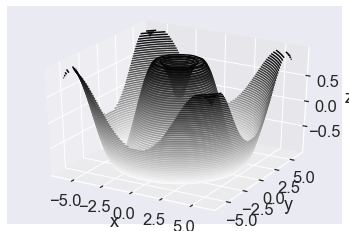

In [39]:
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
 
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
 
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');